In [1]:
from svm import *

suffix = "180days_all"
prefix_ori = "C:\\Users\\t-haohu\\Documents\\Python\\news\\Data"
prefix = "C:\\Users\\t-haohu\\Documents\\Python\\IndustryClassifier\\Data"

data_train = "{}\\middle\\train_{}.txt".format(prefix,suffix)
data_test = "{}\\middle\\test_{}.txt".format(prefix,suffix)
data_industry = "{}\\ready\\industry_{}.wl".format(prefix,suffix)

text_clf_svm_1 = Pipeline([('vect', CountVectorizer(stop_words='english',ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer()),
                    #('svc',SVC(C=1000000,kernel='linear',probability=True,tol=1e-2))
                      ('clf-svm', SGDClassifier(loss='hinge', penalty='elasticnet',
                                            alpha=1e-9, n_iter=40, random_state=0)),
 ])
title,label = load_data(data_train,data_industry)
test_title,test_label = load_data(data_test,data_industry)
#train(text_clf_svm_1,title,label)
#test(text_clf_svm_1,test_title,test_label)

In [2]:
import pickle
text_clf_svm_1=pickle.load(open("svm_180_85.pkl","rb"))

In [ ]:
def softmax(x):
    exponent = np.exp(x- np.max(x))
    return exponent/np.sum(exponent,axis=0)
def normalize(x):
    return x/np.sum(x,axis=0)
x=text_clf_svm_1.decision_function(test_title)
predict=text_clf_svm_1.predict(test_title)
x.shape


#x=text_clf_svm_1.decision_function(test_title)
#y=softmax(x)


[1.         1.         1.         1.         0.99926659 1.
 1.         1.         1.         1.         1.         0.99999999
 1.         1.         1.         1.         1.         0.84652331
 0.999998   1.         0.79569923 1.         0.99999906 1.
 0.99971772 1.         1.         1.         1.         1.
 1.         0.99999991 1.         1.         1.         0.99993373
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.99986003 1.
 1.         1.         1.         1.         0.99999159 1.
 1.         1.         1.         1.         0.64217526 0.99999255
 1.         1.         1.         1.         1.         1.
 0.99999634 1.         1.         1.         1.         1.
 1.         0.99999994 0.99878002 1.         0.99347858 1.
 0.99573521 1.         1.         1.         0.99999999 0.77238163
 0.99999357 0.99999494 0.9491894  1.         0.80611966 1.
 1.         1.         1.         0.99996108 0.99999874 1.
 1.         0.99

C:\Users\t-haohu\Documents\Python\IndustryClassifier\svm.py:69: RuntimeWarning: invalid value encountered in true_divide
  recall_th = np.diag(confuse)/np.sum(confuse,axis=0)


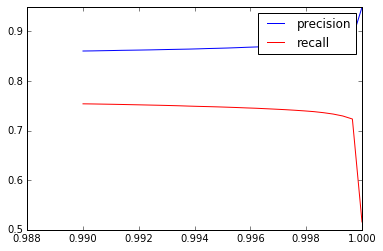

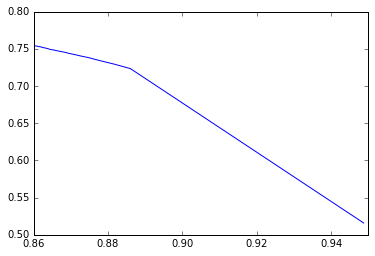

In [31]:

y= np.transpose(softmax(np.transpose(x)))
y=np.max(y,axis=1)
print(y[0:100])
pr_plot(np.array(predict,dtype=np.int),np.array(test_label,dtype=np.int),y,min_th=0.99,max_th=0.99999999999)

In [6]:
import pickle
pickle.dump(text_clf_svm_1,open("svm_180_85.pkl","wb"))

0.9999999999999992


C:\Users\t-haohu\Documents\Python\IndustryClassifier\svm.py:69: RuntimeWarning: invalid value encountered in true_divide
  recall_th = np.diag(confuse)/np.sum(confuse,axis=0)


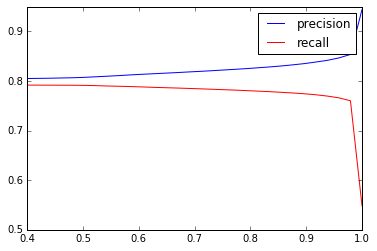

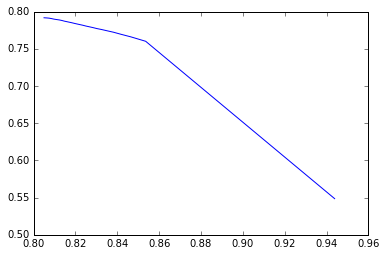

In [32]:
from svm import *

suffix = "180days_all"
prefix_ori = "C:\\Users\\t-haohu\\Documents\\Python\\news\\Data"
prefix = "C:\\Users\\t-haohu\\Documents\\Python\\IndustryClassifier\\Data"

data_train = "{}\\middle\\train_{}_with_linkedin.txt".format(prefix,suffix)
data_test = "{}\\middle\\test_{}.txt".format(prefix,suffix)
data_industry = "{}\\ready\\industry_{}.wl".format(prefix,suffix)

text_clf_svm = Pipeline([('vect', CountVectorizer(stop_words='english',ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer()),
                    #('svc',SVC(C=1000000,kernel='linear',probability=True,tol=1e-2))
                      ('clf-svm', SGDClassifier(loss='hinge', penalty='elasticnet',
                                            alpha=1e-9, n_iter=40, random_state=0)),
 ])
title,label = load_data(data_train,data_industry)
test_title,test_label = load_data(data_test,data_industry)
train(text_clf_svm,title,label)
test(text_clf_svm,test_title,test_label)

Model Training ...


C:\local\Anaconda3-4.1.1-Windows-x86_64\envs\cntk-py35\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Model Training Finished.
0.7314580821836257
Recall:
evergreen		0.2065609228550829
construction		0.4640144665461121
arts		0.5002369668246446
manufacture		0.6208627450980392
transportation		0.712947189097104
government		0.4961470065204505
healthcare&biotechnology		0.7294037544985896
airline		0.7558525258269359
entertainment		0.7124759741394373
non-profit&civilorganization		0.5835396039603961
automotiveindustry		0.8079791847354727
videogame		0.7673074655030074
food		0.6548042704626335
media		0.3857027680730986
education		0.7904991649656709
informationtechnology		0.7525934553925673
finance		0.8136290349116515
retail		0.7204239394684367
sports		0.8579725181567427

Precision:
evergreen		0.5139013452914798
construction		0.4938414164742109
arts		0.45752058951018637
manufacture		0.7348681767545489
transportation		0.7512501602769586
government		0.4903339191564148
healthcare&biotechnology		0.7358453537434991
airline		0.8513931888544891
entertainment		0.5354563361785949
non-profit&civilorganizatio

In [ ]:
from svm import *

suffix = "180days_all"
prefix_ori = "C:\\Users\\t-haohu\\Documents\\Python\\news\\Data"
prefix = "C:\\Users\\t-haohu\\Documents\\Python\\IndustryClassifier\\Data"

data_train = "{}\\middle\\train_{}_with_linkedin.txt".format(prefix,suffix)
data_test = "{}\\middle\\test_{}.txt".format(prefix,suffix)
data_industry = "{}\\ready\\industry_{}.wl".format(prefix,suffix)

text_clf_svm = Pipeline([('vect', CountVectorizer(stop_words='english',ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer()),
                    #('svc',SVC(C=1000000,kernel='linear',probability=True,tol=1e-2))
                      ('clf-svm', SGDClassifier(loss='hinge', penalty='elasticnet',
                                            alpha=1e-2, n_iter=40, random_state=0)),
 ])
title,label = load_data(data_train,data_industry)
test_title,test_label = load_data(data_test,data_industry)
train(text_clf_svm,title,label)
test(text_clf_svm,test_title,test_label)

In [55]:
from sklearn.externals import joblib
from data_processor import *


process_setting(low =False,old = True,stop = False)
#text_clf_svm=joblib.load('svm_170_88.pkl')
suffix = "170_19"
prefix = "C:\\Users\\t-haohu\\Documents\\Python\\IndustryClassifier\\Data"
industry =[x.rstrip("\n") for x in open("{}\\ready\\industry_{}.wl".format(prefix_ori,suffix)).readlines()]
suffix = "1day_measure"
val_doc = "{}\\middle\\{}.txt".format(prefix,suffix)
val_doc = [x.strip("\n") for x in open(val_doc).readlines()]


#process_setting(low =False,old = False,stop = False)
#val_doc = [tokenize(x) for x in val_doc]
output_file = "{}\\middle\\{}_predict.txt".format(prefix,suffix)
output = open(output_file,"w",encoding = "utf-8")
for x in [industry[x] for x in text_clf_svm.predict(val_doc)]:
    output.write(x+"\n")

#print([industry[x] for x in text_clf_svm_1.predict(val_doc)])

C:\local\Anaconda3-4.1.1-Windows-x86_64\envs\cntk-py35\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [5]:
from sklearn.externals import joblib
from data_processor import *
from data_generator import *
suffix = "170_19"
prefix = "C:\\Users\\t-haohu\\Documents\\Python\\IndustryClassifier\\Data"
prefix_ori = "C:\\Users\\t-haohu\\Documents\\Python\\news\\Data"
industry ={x.rstrip("\n"):i for i,x in enumerate(open("{}\\ready\\industry_{}.wl".format(prefix_ori,suffix)).readlines())}
suffix = "1day_measure"
val_doc = "{}\\middle\\{}.txt".format(prefix,suffix)
val_doc_concated = "{}\\middle\\{}_concated.txt".format(prefix,suffix)
#val_doc = [x.strip("\n") for x in open(val_doc).readlines()]
val_doc_sample = "{}\\middle\\{}_sample.txt".format(prefix,suffix)
output_file = "{}\\middle\\{}_predict.txt".format(prefix,suffix)
#output_file = [x.strip("\n") for x in open(output_file).readlines()]
concatenate_data([val_doc,output_file],val_doc_concated)
sample=sample_data(val_doc_concated,val_doc_sample,19,per_class=20,classifier=(lambda x:industry[x.split("\t")[1].strip("\n")]))

Sample Data Succeed. Total: 380


In [ ]:
from sklearn.externals import joblib
from data_processor import *
from data_generator import *
suffix = "170_19"
prefix = "C:\\Users\\t-haohu\\Documents\\Python\\IndustryClassifier\\Data"
prefix_ori = "C:\\Users\\t-haohu\\Documents\\Python\\news\\Data"